## Laboratorio 3 - Clasificación

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Clasificador de Género

In [30]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np 
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Carga y Visualización de Datos

In [31]:
#Importamos el CSV
dataset = pd.read_csv('genero.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [32]:
dataset.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,M
freq,37,19,14,32,33


<b>Vamos a realizar un clasificador basado en reglas. En nuestro caso elegimos el algoritmo PRISM</b>

### Limpieza de campos nulos

In [33]:
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Favorite Color,0
Favorite Music Genre,0
Favorite Beverage,0
Favorite Soft Drink,0
Gender,0


Por suerte no hay datos nulos por lo que podemos continuar sin eliminar nada del dataset

### 1) Crea un clasificador en el que uses al menos dos criterios de división distintos. Calcula el error de cada uno de ellos y elige el que mejor clasifique (1 punto).

Preparamos los datos para el clasificador normalizando los valores de cada campo

In [34]:
# Creamos un nuevo dataframe para los datos numéricos.
datasetNormalizado = pd.DataFrame()

# Iteramos sobre las columnas del dataframe con los datos categóricos.
for columna in dataset.columns:
    # Introducimos la columna con los datos pasados a numéricos. Esto es necesario pues la librería de sklearn solo
    # trabaja con valores numéricos.
    datasetNormalizado[columna] = pd.factorize(dataset[columna])[0]

# Creamos el array con la clase de cada registro.
prediccion = datasetNormalizado["Gender"].values

# Eliminamos la columna "Venenosa" que no la necesitamos más en el dataframe.
del datasetNormalizado["Gender"]

#Extraemos del dataset el nombre de cada característica.
columnas = datasetNormalizado.columns

# Mostramos el nuevo dataframe.
datasetNormalizado.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,0,0,0
1,1,1,0,1
2,2,0,1,1
3,2,2,2,2
4,0,0,0,1


In [53]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datasetNormalizado, prediccion, stratify=prediccion, test_size=0.2)

### Vamos a realizar un árbol de decision

### Entropía

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el árbol.
arbolEntropia = DecisionTreeClassifier(criterion='entropy')

# Entrenamos el árbol.
arbolEntropia.fit(x_train, y_train)

print("El acierto del conjunto de entrenamiento es del " 
      + "\033[1m" + str(round(arbolEntropia.score(x_train, y_train) * 100, 1)) + "%" + "\033[0m".format())

print("El acierto del conjunto de validación es del " 
      + "\033[1m" + str(round(arbolEntropia.score(x_test, y_test) * 100, 1)) + "%" + "\033[0m")

El acierto del conjunto de entrenamiento es del 96.2%
El acierto del conjunto de validación es del 21.4%


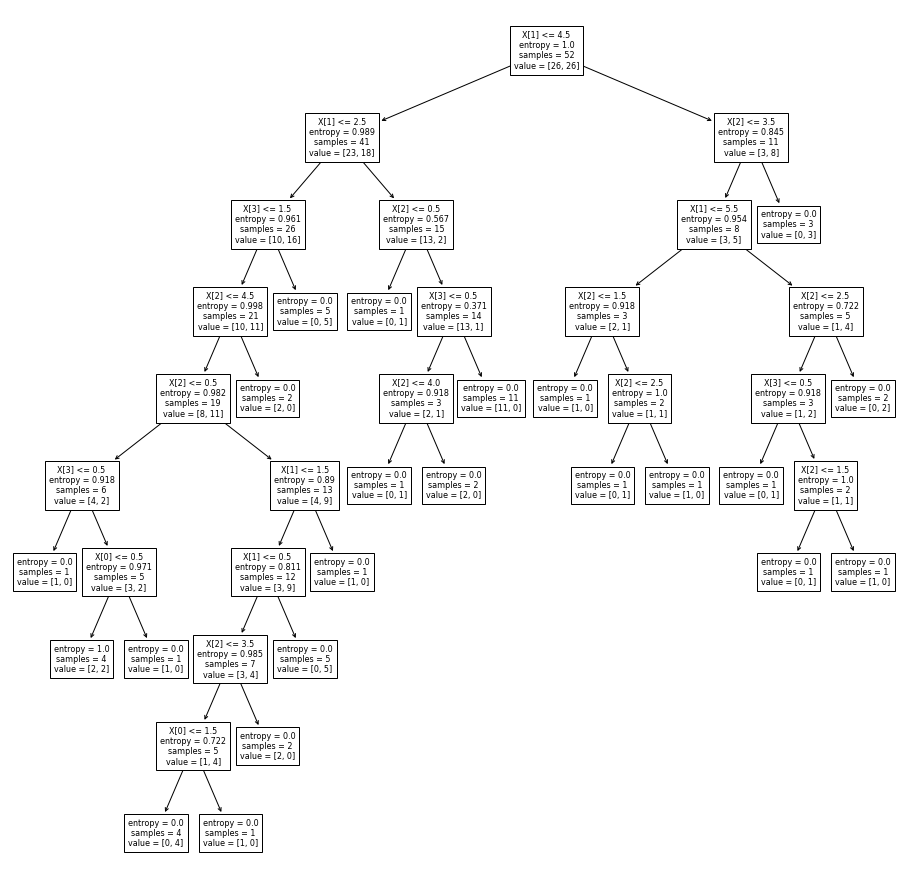

In [51]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(arbolEntropia, fontsize=8)
plt.show()

### Gini

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el árbol.
arbolGini = DecisionTreeClassifier(criterion='gini')

# Entrenamos el árbol.
arbolGini.fit(x_train, y_train)

print("El acierto del conjunto de entrenamiento es del " 
      + "\033[1m" + str(round(arbolGini.score(x_train, y_train) * 100, 1)) + "%" + "\033[0m".format())

print("El acierto del conjunto de validación es del " 
      + "\033[1m" + str(round(arbolGini.score(x_test, y_test) * 100, 1)) + "%" + "\033[0m" )

El acierto del conjunto de entrenamiento es del 96.2%
El acierto del conjunto de validación es del 21.4%


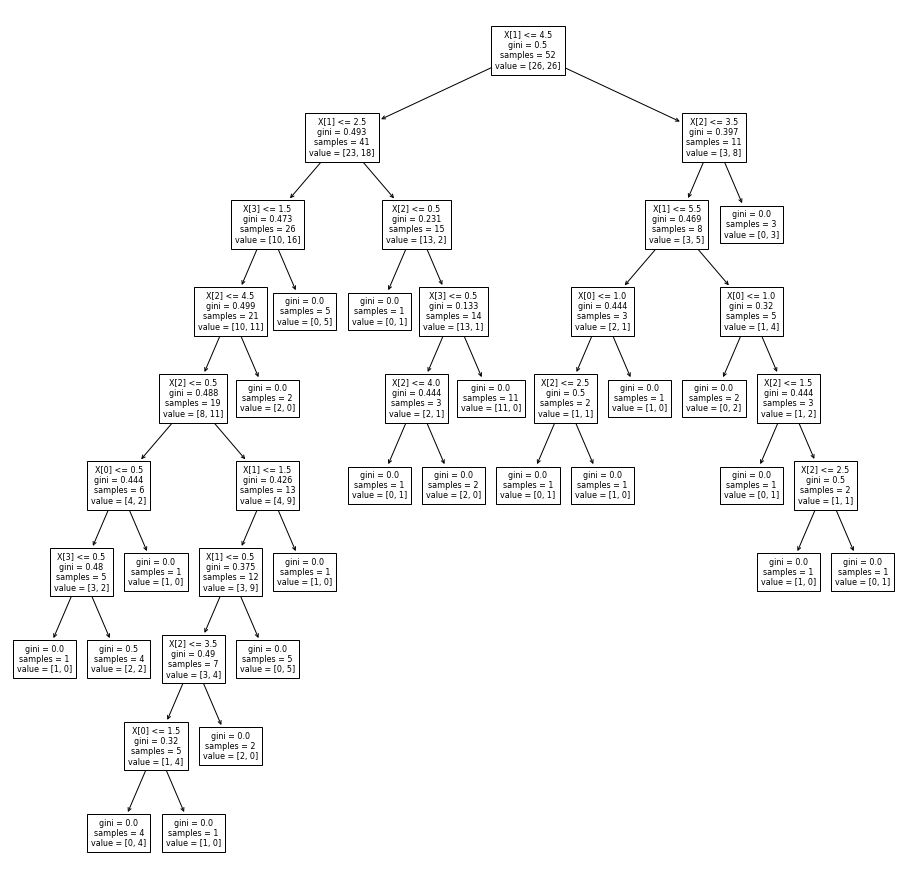

In [54]:
fig, ax = plt.subplots(figsize=(16, 16))
tree.plot_tree(arbolGini, fontsize=8)
plt.show()

### 2) Dibuja el modelo elegido en el punto anterior (0.5 puntos).

In [31]:
modelo =  datasetOriginal[(datasetOriginal['Favorite Color'] == 'Cool') &
                  (datasetOriginal['Favorite Music Genre'] == 'Pop') & 
                  (datasetOriginal['Favorite Beverage'] == "Doesn't drink")]
modelo

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
19,Cool,Pop,Doesn't drink,7UP/Sprite,F
27,Cool,Pop,Doesn't drink,Other,F
28,Cool,Pop,Doesn't drink,Coca Cola/Pepsi,F


### 3) Selecciona tres reglas que sean las que generalicen lo menos posible y otras tres que especialicen lo menos posible. Interprétalas. (0,5 puntos).

In [32]:
#Generalizar, de lo general a lo específico

#Si color es Warm, entonces Chico
#Si bebida es Whisky, entonces Chico
#Si género favorito Hip Hop, entonces Chico

#Especializacion, de lo específico a lo general

#Si Color = Cool, Género = Pop y Beverage = Does not Drink => Entonces es Chica
#Si genero musical = Electronic y bebida alcohólica = Whiskey => Entonces es Chico
#Si género favorito Hip Hop, entonces Chico

### 4) Usa tu clasificador para decidir qué género corresponde a las preferencias de cada uno de los miembros del equipo de prácticas (al menos estudiad 4 preferencias) (1 punto)